# Imports

In [11]:
import os
import tifffile
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

In [ ]:
class ImageProcessing:
    @staticmethod
    def add_blank(img_arr, width, height):
        '''
        Parameters
        ----------
        img_arr : numpy array
            Img to add blank spaces
        width : int
            width, that should be
        height : int
            height, that should be

        Returns
        -------
        New img of sizes width x height
        '''
        
        img_h, img_w = img_arr.shape[:2]
        h_shape = list(img_arr.shape)
        h_shape[0] = height - img_h
        h_arr = np.zeros(h_shape)
        img_arr = np.append(img_arr, h_arr, 0)
       
        img_h, img_w = img_arr.shape[:2]
        v_shape = list(img_arr.shape)
        v_shape[1] = width - img_w
        v_arr = np.zeros(v_shape)
        img_arr = np.append(img_arr, v_arr, 1)

        return img_arr
        

    @staticmethod
    def split_img(img_arr, size):
        h = int(img_arr.shape[0] / size)
        w = int(img_arr.shape[1] / size)
        res = np.zeros((h, w, size, size, img_arr.shape[-1]), dtype=img_arr.dtype)
        
        for i in range(h):
            for j in range(w):
                res[i][j] = img_arr[i * size : i * size + size, 
                                    j * size : j * size + size]
        return res


# Define data path

In [4]:
DATA = Path('../scripts/data/data/')

# Load data

In [18]:
ndvi1 = tifffile.imread(DATA / 'ndvi1.TIF')
ndvi2 = tifffile.imread(DATA / 'ndvi2.TIF')
classes = tifffile.imread(DATA / 'classes.TIF')

In [19]:
ndvi1.shape, ndvi2.shape, classes.shape

((7820, 7598), (7820, 7598), (7820, 7598))

# Reshape images

In [20]:
ndvi1 = ImageProcessing.add_blank(ndvi1, 8192, 8192)
ndvi2 = ImageProcessing.add_blank(ndvi2, 8192, 8192)
classes = ImageProcessing.add_blank(classes, 8192, 8192)

(<Figure size 988.8x604.8 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x1d981150d08>)

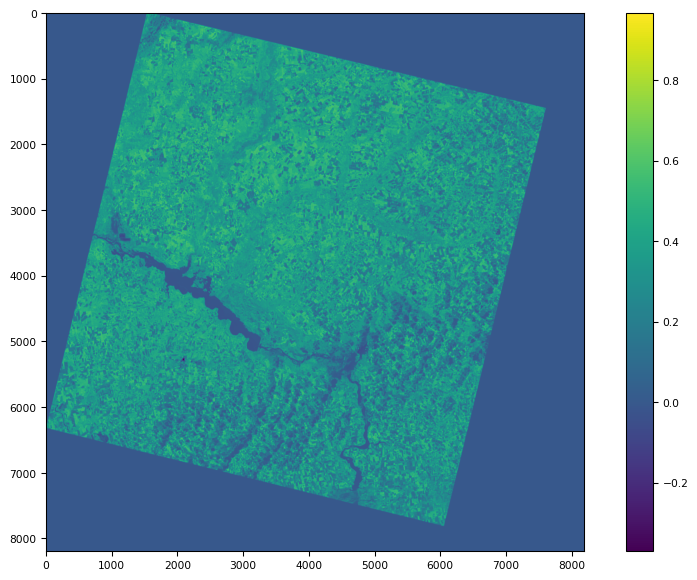

In [12]:
tifffile.imshow(ndvi1)

In [21]:
ndvi1.shape += (1,)
ndvi2.shape += (1,)
classes.shape += (1,)

# Preprocess data

In [22]:
ndvi1 = ImageProcessing.split_img(ndvi1, 64).astype('float32')
ndvi2 = ImageProcessing.split_img(ndvi2, 64).astype('float32')
classes = ImageProcessing.split_img(classes, 64).astype('uint8')
ndvi1.shape, ndvi2.shape, classes.shape

((128, 128, 64, 64, 1), (128, 128, 64, 64, 1), (128, 128, 64, 64, 1))

In [23]:
ndvi1 = ndvi1.reshape((-1, 64, 64, 1))
ndvi2 = ndvi2.reshape((-1, 64, 64, 1))
classes = classes.reshape((-1, 64, 64, 1))
ndvi1.shape, ndvi2.shape, classes.shape

((16384, 64, 64, 1), (16384, 64, 64, 1), (16384, 64, 64, 1))

# Save x, y data

In [ ]:
os.mkdir('../scripts/data/data/x_data/')
os.mkdir('../scripts/data/data/y_data/')

for i in range(ndvi1.shape[0]):
    tifffile.imsave('../scripts/data/data/' + str(i) + '.TIF', np.concatenate(ndvi1[i], ndvi2[i]), -1)
    tifffile.imsave('../scripts/data/data/' + str(i) + '.TIF', classes[i])